# Historical Housing Metrics

### 1. Imports

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy_ext import rolling_apply

### 2. Data processing

#### 2.1. Reading data from CSV

In [122]:
SHILLER_DATA_PATH = "../../data/raw/shiller.csv"
REAL_ESTATE_DATA_PATH = "../../data/raw/real_estate.csv"

INFLATION_COLS = [ "date", "cpi" ]
INDICES_COLS = [ "date", "home_price_index", "building_cost_index", "population_millions" ]

HOUSING_COLS_MAP = {
  "date": "date",
  "cpi": "cpi",
  "home_price_index": "hpi",
  "building_cost_index": "bci",
  "population_millions": "population",
}
HOUSING_COLS = list(HOUSING_COLS_MAP.keys())

In [123]:
shiller_df = pd.read_csv(SHILLER_DATA_PATH)
real_estate_df = pd.read_csv(REAL_ESTATE_DATA_PATH)

#### 2.2. Keeping only the relevant information

In [124]:
inflation_df = shiller_df[INFLATION_COLS]
indices_df = real_estate_df[INDICES_COLS]

In [125]:
housing_df = pd.merge(inflation_df, indices_df, on="date", how="inner")
housing_df = housing_df.rename(columns=HOUSING_COLS_MAP)
housing_df

,date,cpi,hpi,bci,population
0,1890-01,7.612,3.557296,7.611652,63.05600
1,1890-02,7.612,3.528281,7.575659,63.16475
2,1890-03,7.612,3.499266,7.539665,63.27350
3,1890-04,7.612,3.470250,7.503672,63.38225
4,1890-05,7.707,3.441235,7.467679,63.49100
...,...,...,...,...,...
1609,2024-02,310.326,312.770000,NaN,NaN
1610,2024-03,312.332,316.950000,NaN,NaN
1611,2024-04,313.548,320.860000,NaN,NaN
1612,2024-05,314.069,323.860000,NaN,NaN


#### 2.3. Appending additional columns

##### 2.3.1. Real HPI and real BCI

In [126]:
curr_cpi = housing_df.iloc[-1]["cpi"]

housing_df["real_hpi"] = housing_df["hpi"] * (curr_cpi / housing_df["cpi"])
housing_df["real_hpi"] = housing_df["real_hpi"] / housing_df.iloc[0]["real_hpi"]

housing_df["real_bci"] = housing_df["bci"] * (curr_cpi / housing_df["cpi"])
housing_df["real_bci"] = housing_df["real_bci"] / housing_df.iloc[0]["real_bci"]

housing_df = housing_df.drop(columns=["cpi", "hpi", "bci"])
housing_df

,date,population,real_hpi,real_bci
0,1890-01,63.05600,1.000000,1.000000
1,1890-02,63.16475,0.991843,0.995271
2,1890-03,63.27350,0.983687,0.990543
3,1890-04,63.38225,0.975530,0.985814
4,1890-05,63.49100,0.955449,0.968992
...,...,...,...,...
1609,2024-02,NaN,2.156680,NaN
1610,2024-03,NaN,2.171466,NaN
1611,2024-04,NaN,2.189728,NaN
1612,2024-05,NaN,2.206536,NaN


##### 2.3.2. Basic monthly index inflation measures

In [127]:
housing_df["1_mo_hpi"] = housing_df["real_hpi"].pct_change()
housing_df["1_mo_bci"] = housing_df["real_bci"].pct_change()
housing_df

,date,population,real_hpi,real_bci,1_mo_hpi,1_mo_bci
0,1890-01,63.05600,1.000000,1.000000,NaN,NaN
1,1890-02,63.16475,0.991843,0.995271,-0.008157,-0.004729
2,1890-03,63.27350,0.983687,0.990543,-0.008224,-0.004751
3,1890-04,63.38225,0.975530,0.985814,-0.008292,-0.004774
4,1890-05,63.49100,0.955449,0.968992,-0.020585,-0.017064
...,...,...,...,...,...,...
1609,2024-02,NaN,2.156680,NaN,-0.000013,0.000000
1610,2024-03,NaN,2.171466,NaN,0.006856,0.000000
1611,2024-04,NaN,2.189728,NaN,0.008410,0.000000
1612,2024-05,NaN,2.206536,NaN,0.007675,0.000000


##### 2.3.3. Annualized 1-year index inflation measure

In [128]:
housing_df["1_yr_hpi"] = housing_df["real_hpi"].pct_change(periods=12)
housing_df["1_yr_bci"] = housing_df["real_bci"].pct_change(periods=12)
housing_df

,date,population,real_hpi,real_bci,1_mo_hpi,1_mo_bci,1_yr_hpi,1_yr_bci
0,1890-01,63.05600,1.000000,1.000000,NaN,NaN,NaN,NaN
1,1890-02,63.16475,0.991843,0.995271,-0.008157,-0.004729,NaN,NaN
2,1890-03,63.27350,0.983687,0.990543,-0.008224,-0.004751,NaN,NaN
3,1890-04,63.38225,0.975530,0.985814,-0.008292,-0.004774,NaN,NaN
4,1890-05,63.49100,0.955449,0.968992,-0.020585,-0.017064,NaN,NaN
...,...,...,...,...,...,...,...,...
1609,2024-02,NaN,2.156680,NaN,-0.000013,0.000000,0.033292,-0.029325
1610,2024-03,NaN,2.171466,NaN,0.006856,0.000000,0.030234,-0.025110
1611,2024-04,NaN,2.189728,NaN,0.008410,0.000000,0.029678,-0.019170
1612,2024-05,NaN,2.206536,NaN,0.007675,0.000000,0.026977,-0.015687


##### 2.3.4. Annualized 5-year index inflation measure

In [129]:
housing_df["5_yr_hpi"] = housing_df["real_hpi"].pct_change(periods=60)
housing_df["5_yr_bci"] = housing_df["real_bci"].pct_change(periods=60)
housing_df

,date,population,real_hpi,real_bci,1_mo_hpi,1_mo_bci,1_yr_hpi,1_yr_bci,5_yr_hpi,5_yr_bci
0,1890-01,63.05600,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,1890-02,63.16475,0.991843,0.995271,-0.008157,-0.004729,NaN,NaN,NaN,NaN
2,1890-03,63.27350,0.983687,0.990543,-0.008224,-0.004751,NaN,NaN,NaN,NaN
3,1890-04,63.38225,0.975530,0.985814,-0.008292,-0.004774,NaN,NaN,NaN,NaN
4,1890-05,63.49100,0.955449,0.968992,-0.020585,-0.017064,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1609,2024-02,NaN,2.156680,NaN,-0.000013,0.000000,0.033292,-0.029325,0.246169,-0.104845
1610,2024-03,NaN,2.171466,NaN,0.006856,0.000000,0.030234,-0.025110,0.253513,-0.099233
1611,2024-04,NaN,2.189728,NaN,0.008410,0.000000,0.029678,-0.019170,0.259063,-0.093898
1612,2024-05,NaN,2.206536,NaN,0.007675,0.000000,0.026977,-0.015687,0.261287,-0.091401


##### 2.3.5. Annualized 10-year index inflation measure

In [130]:
housing_df["10_yr_hpi"] = housing_df["real_hpi"].pct_change(periods=120)
housing_df["10_yr_bci"] = housing_df["real_bci"].pct_change(periods=120)
housing_df

,date,population,real_hpi,real_bci,1_mo_hpi,1_mo_bci,1_yr_hpi,1_yr_bci,5_yr_hpi,5_yr_bci,10_yr_hpi,10_yr_bci
0,1890-01,63.05600,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1890-02,63.16475,0.991843,0.995271,-0.008157,-0.004729,NaN,NaN,NaN,NaN,NaN,NaN
2,1890-03,63.27350,0.983687,0.990543,-0.008224,-0.004751,NaN,NaN,NaN,NaN,NaN,NaN
3,1890-04,63.38225,0.975530,0.985814,-0.008292,-0.004774,NaN,NaN,NaN,NaN,NaN,NaN
4,1890-05,63.49100,0.955449,0.968992,-0.020585,-0.017064,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1609,2024-02,NaN,2.156680,NaN,-0.000013,0.000000,0.033292,-0.029325,0.246169,-0.104845,0.480140,-0.111189
1610,2024-03,NaN,2.171466,NaN,0.006856,0.000000,0.030234,-0.025110,0.253513,-0.099233,0.487603,-0.107757
1611,2024-04,NaN,2.189728,NaN,0.008410,0.000000,0.029678,-0.019170,0.259063,-0.093898,0.488621,-0.107103
1612,2024-05,NaN,2.206536,NaN,0.007675,0.000000,0.026977,-0.015687,0.261287,-0.091401,0.489565,-0.106269


#### 2.4. Save results as derived dataset 

##### 2.4.1. Keeping only the relevant columns, again

In [131]:
results_df = housing_df.drop(columns=["population"])
results_df

,date,real_hpi,real_bci,1_mo_hpi,1_mo_bci,1_yr_hpi,1_yr_bci,5_yr_hpi,5_yr_bci,10_yr_hpi,10_yr_bci
0,1890-01,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1890-02,0.991843,0.995271,-0.008157,-0.004729,NaN,NaN,NaN,NaN,NaN,NaN
2,1890-03,0.983687,0.990543,-0.008224,-0.004751,NaN,NaN,NaN,NaN,NaN,NaN
3,1890-04,0.975530,0.985814,-0.008292,-0.004774,NaN,NaN,NaN,NaN,NaN,NaN
4,1890-05,0.955449,0.968992,-0.020585,-0.017064,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1609,2024-02,2.156680,NaN,-0.000013,0.000000,0.033292,-0.029325,0.246169,-0.104845,0.480140,-0.111189
1610,2024-03,2.171466,NaN,0.006856,0.000000,0.030234,-0.025110,0.253513,-0.099233,0.487603,-0.107757
1611,2024-04,2.189728,NaN,0.008410,0.000000,0.029678,-0.019170,0.259063,-0.093898,0.488621,-0.107103
1612,2024-05,2.206536,NaN,0.007675,0.000000,0.026977,-0.015687,0.261287,-0.091401,0.489565,-0.106269


##### 2.4.2. Save simplified results as derived dataset

In [132]:
HOUSING_DATA_PATH = "../../data/derived/housing.csv"

In [133]:
results_df.filter(items=["date", "real_hpi", "real_bci"]).to_csv(HOUSING_DATA_PATH)

### 3. Analysis of results

#### 3.1. U.S. population growth over time

##### 3.1.1. Raw population rate

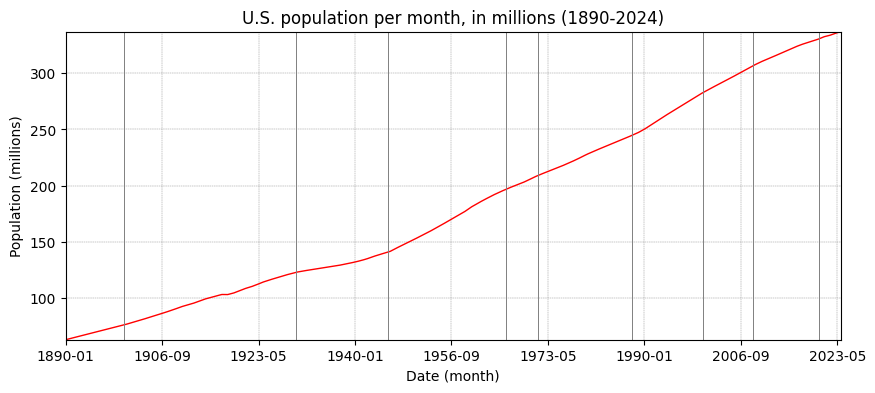

In [134]:
housing_df.plot(x="date", y="population", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("U.S. population per month, in millions (1890-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Population (millions)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.1.2. Differential population rate, month-over-month

In [135]:
pop_stats_df = housing_df.copy()
pop_stats_df["population_diff"] = pop_stats_df["population"].diff()

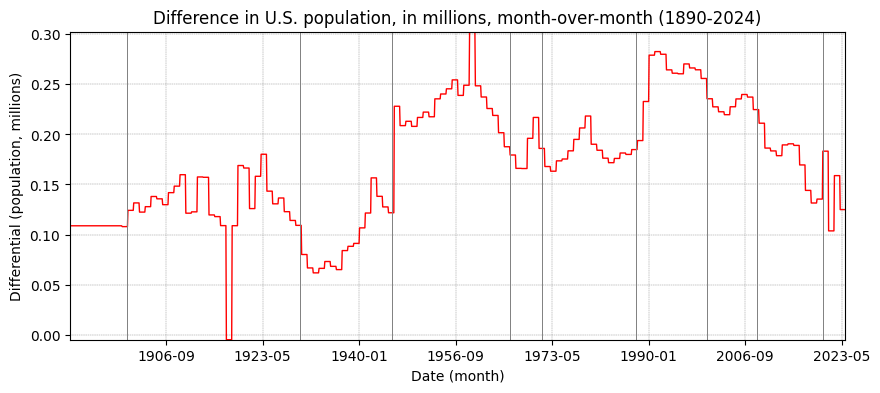

In [136]:
pop_stats_df.plot(x="date", y="population_diff", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Difference in U.S. population, in millions, month-over-month (1890-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Differential (population, millions)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.1.3. Differential population rate, year-over-year

In [137]:
yr_pop_stats_df = housing_df.copy()
yr_pop_stats_df["population_diff"] = yr_pop_stats_df["population"].diff(periods=12)

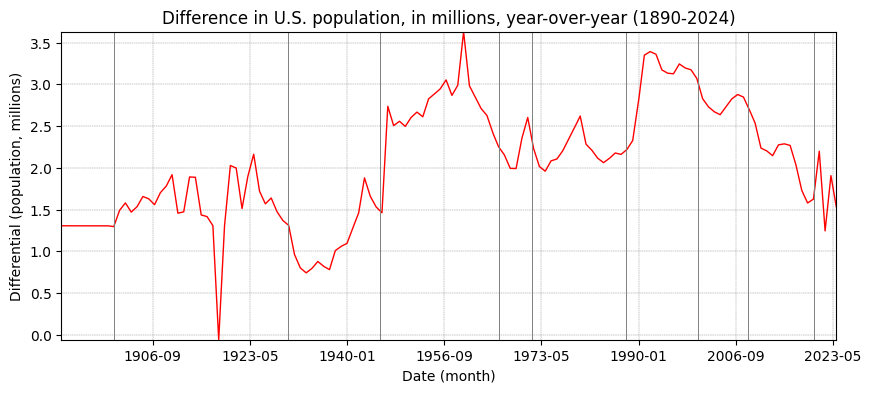

In [138]:
yr_pop_stats_df.plot(x="date", y="population_diff", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Difference in U.S. population, in millions, year-over-year (1890-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Differential (population, millions)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 3.2. How do housing indices scale as the U.S. population grows?

##### 3.2.1. Real home price index vs U.S. population 

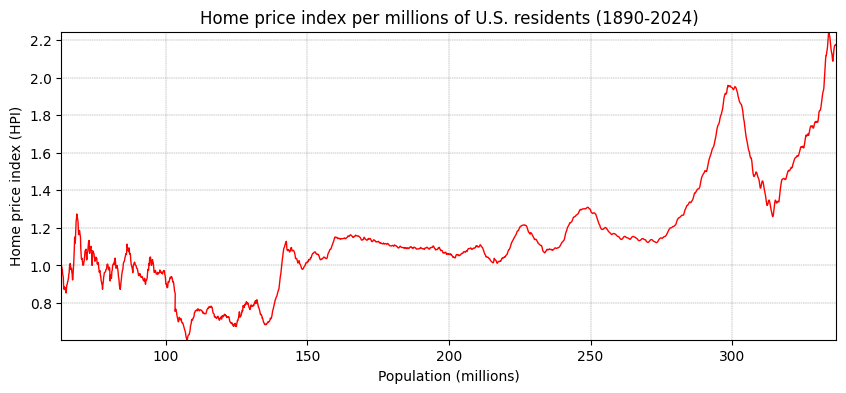

In [139]:
housing_df.plot(x="population", y="real_hpi", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.title("Home price index per millions of U.S. residents (1890-2024)")
plt.xlabel("Population (millions)")
plt.ylabel("Home price index (HPI)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.2.2. Real building cost index vs U.S. population

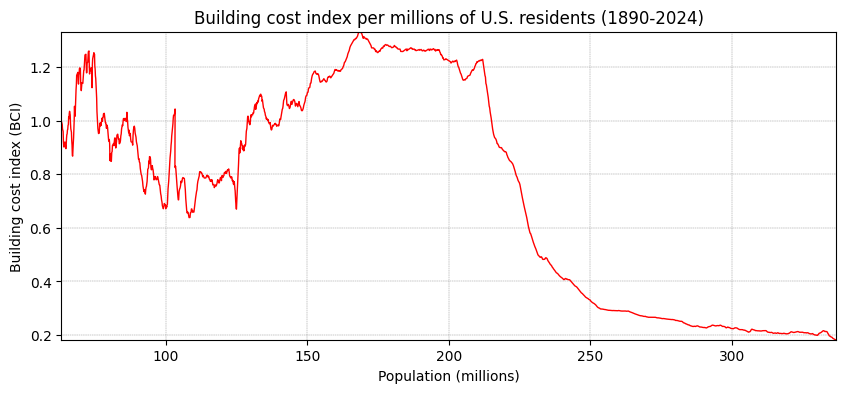

In [140]:
housing_df.plot(x="population", y="real_bci", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.title("Building cost index per millions of U.S. residents (1890-2024)")
plt.xlabel("Population (millions)")
plt.ylabel("Building cost index (BCI)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 3.3. How do the housing indices correlate with each other?

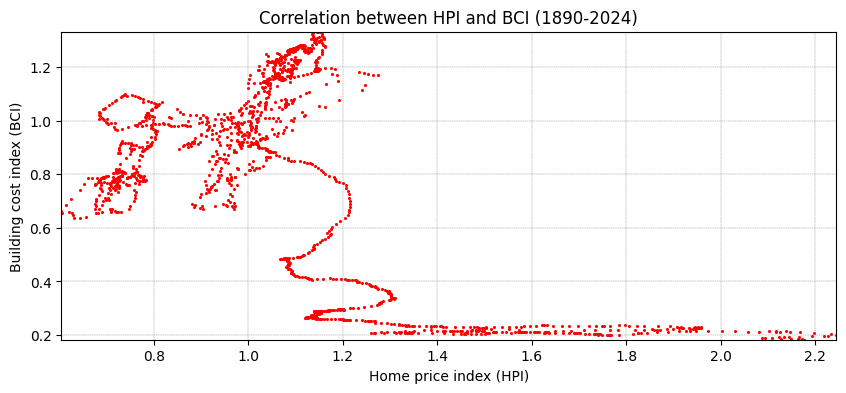

In [141]:
housing_df.plot.scatter(x="real_hpi",y="real_bci",lw=1.0,s=1.5,c='red',legend=False,figsize=(10,4))
plt.title("Correlation between HPI and BCI (1890-2024)")
plt.xlabel("Home price index (HPI)")
plt.ylabel("Building cost index (BCI)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 3.4. Home price index inflation rate analysis

##### 3.4.1. Raw HPI growth rate

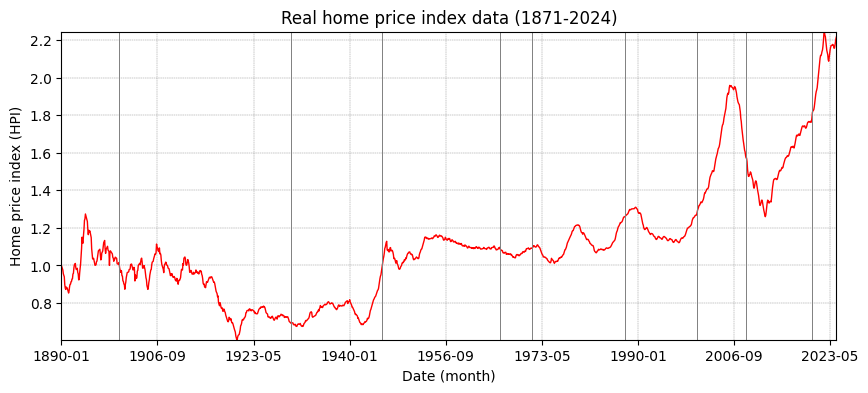

In [142]:
results_df.plot(x="date", y="real_hpi", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Real home price index data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Home price index (HPI)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.4.2. Monthly inflation trends (normalized differential rate)

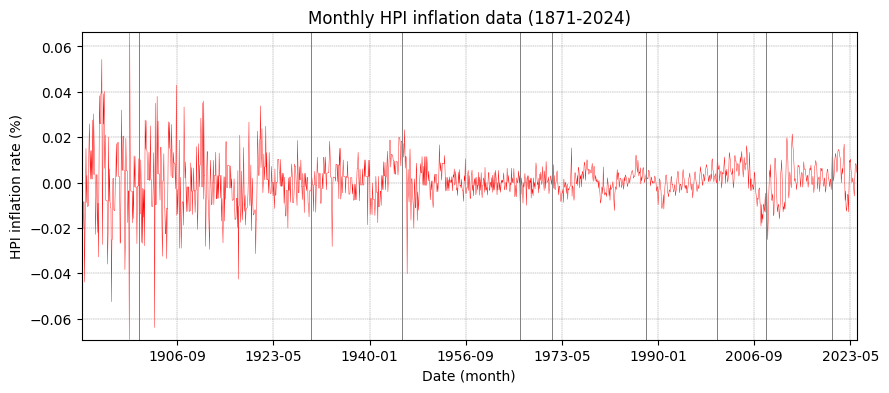

In [143]:
results_df.plot(x="date", y="1_mo_hpi", lw=0.3, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly HPI inflation data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("HPI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.4.3. Annual inflation trends

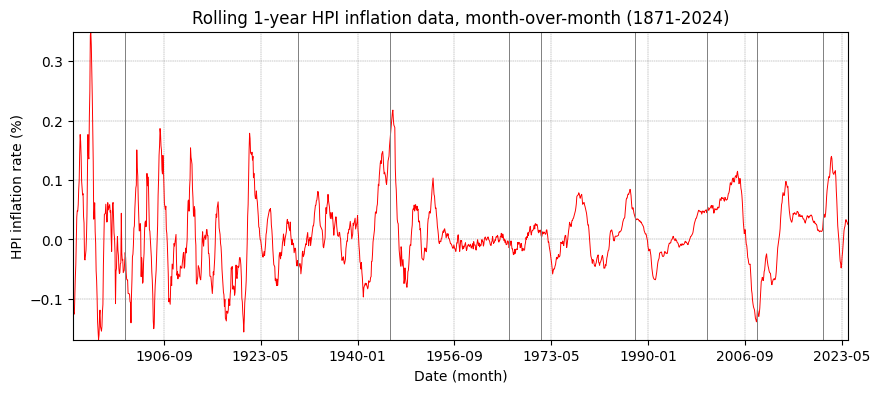

In [144]:
results_df.plot(x="date", y="1_yr_hpi", lw=0.7, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 1-year HPI inflation data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("HPI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.4.4. 5-year inflation trends

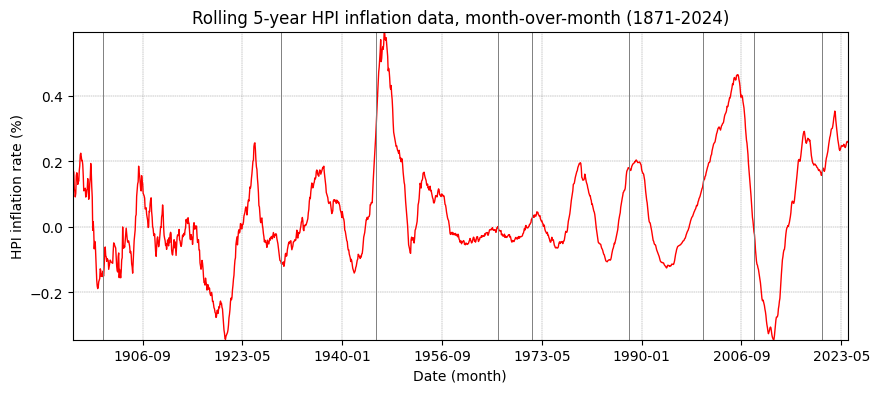

In [145]:
results_df.plot(x="date", y="5_yr_hpi", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 5-year HPI inflation data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("HPI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.4.5. 10-year inflation trends

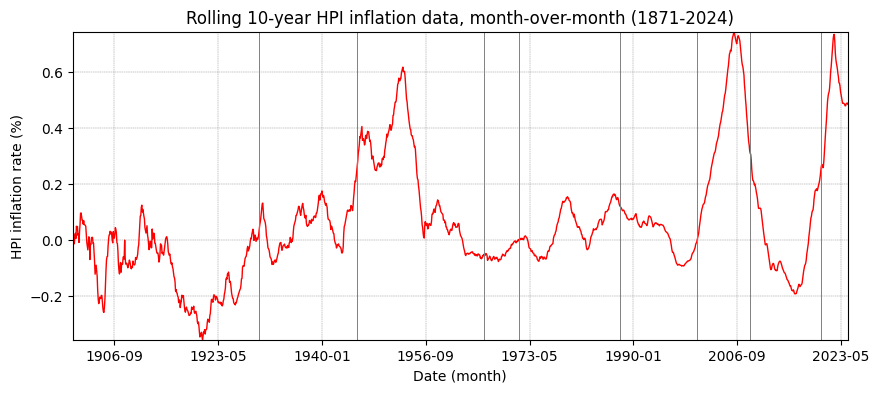

In [146]:
results_df.plot(x="date", y="10_yr_hpi", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 10-year HPI inflation data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("HPI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 3.5. Building cost index inflation rate analysis

##### 3.5.1. Raw BCI growth rate

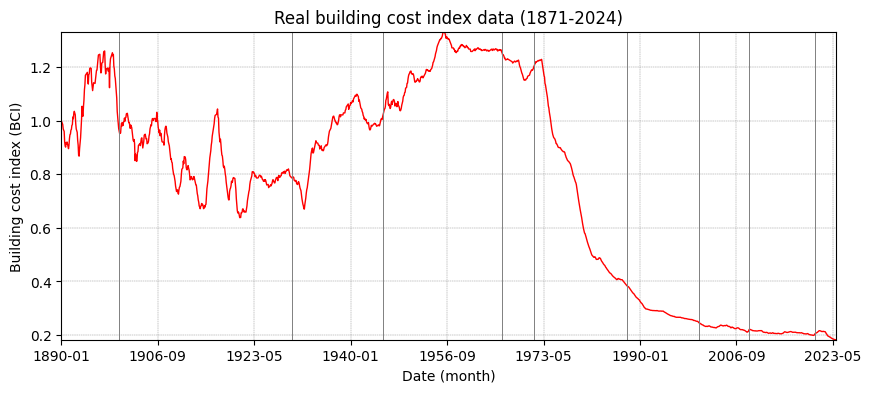

In [147]:
results_df.plot(x="date", y="real_bci", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Real building cost index data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Building cost index (BCI)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.5.2. Monthly inflation trends (normalized differential rate)

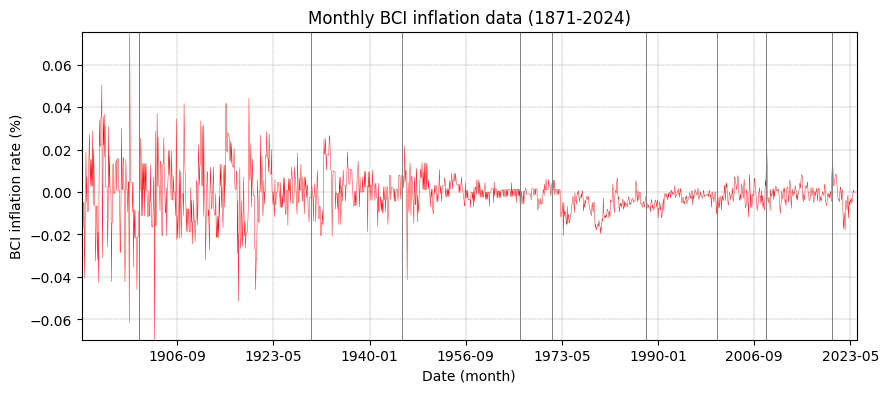

In [148]:
results_df.plot(x="date", y="1_mo_bci", lw=0.3, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly BCI inflation data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("BCI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.5.3. Annual inflation trends

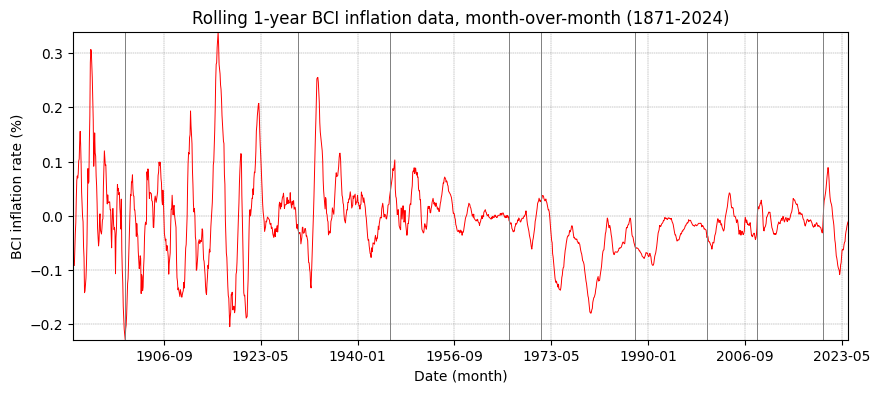

In [149]:
results_df.plot(x="date", y="1_yr_bci", lw=0.7, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 1-year BCI inflation data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("BCI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.5.4. 5-year inflation trends

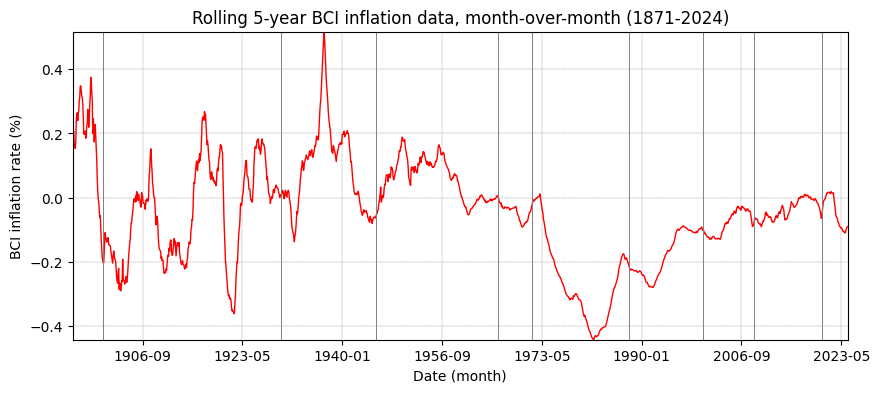

In [150]:
results_df.plot(x="date", y="5_yr_bci", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 5-year BCI inflation data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("BCI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.5.5. 10-year inflation trends

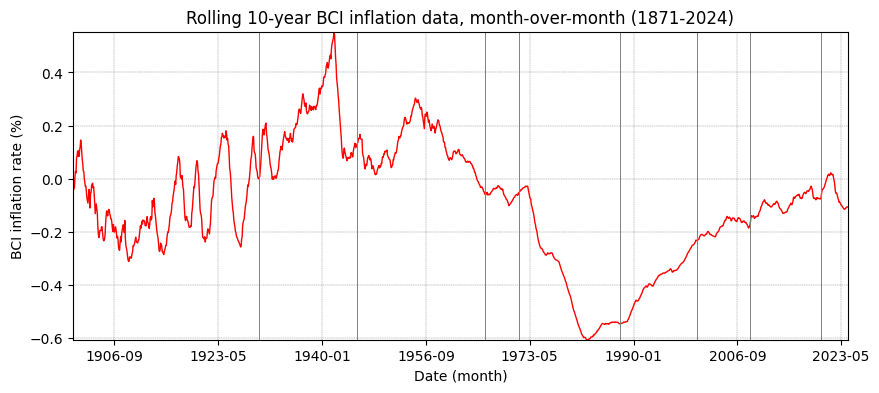

In [151]:
results_df.plot(x="date", y="10_yr_bci", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 10-year BCI inflation data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("BCI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()